### Convenção de sinal positivo (R. C. Hibbeler - 5a edição)

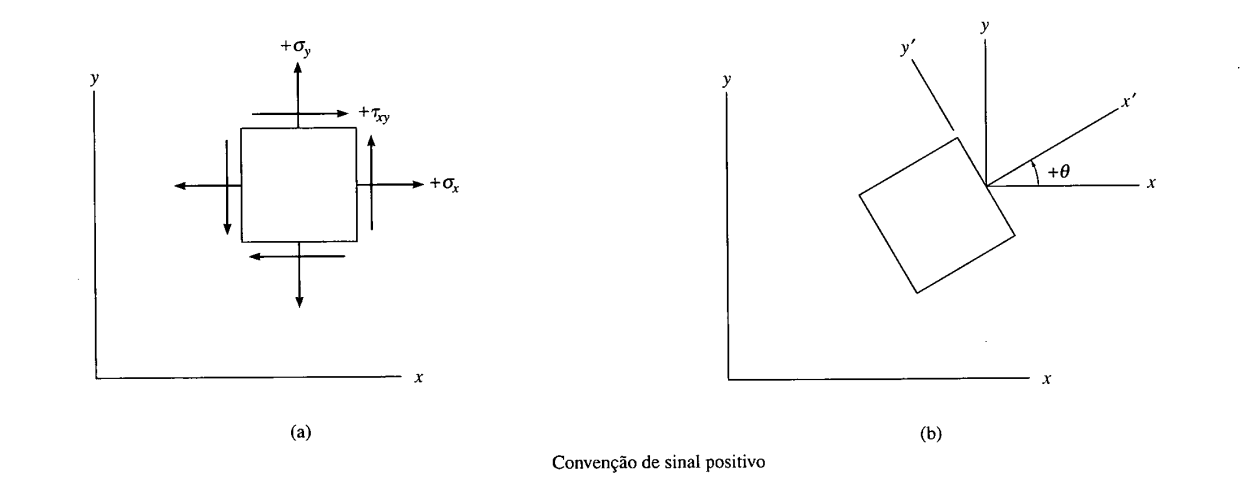

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def RoundNum(number,round_number,type_round='up'):
    number = int(number)
    if number > 0:
        for i in range(0,number+round_number+1,round_number):
          if i > number and type_round == 'up':
              return i
          elif i > number and type_round == 'down':
              return i-round_number
    elif number < 0:
        for i in range(0,number-round_number-1,-round_number):
          if i < number and type_round == 'down':
              return i
          elif i < number and type_round == 'up':
              return i+round_number
    else:
        return 0

class MohrCircle():
    def __init__(self,axial_stress_x,axial_stress_y,shear_stress,degree=0):
        '''
        axial_stress_x -> tensão axial em x conforme a conversão de R. C. Hibbeler - 5a edição
        axial_stress_y -> tensão axial em y conforme a conversão de R. C. Hibbeler - 5a edição
        shear_stress -> tensão de cisalhamento em x conforme a conversão de R. C. Hibbeler - 5a edição
        degree -> rotação conforme a conversão de R. C. Hibbeler - 5a edição
        '''
        self.unity = 'MPa'

        # Dados de entrada
        self.axial_stress_x = axial_stress_x
        self.axial_stress_y = axial_stress_y
        self.shear_stress = shear_stress
        self.degree = degree

        # Pontos fundamentais do círculo
        self.center = (self.axial_stress_x + self.axial_stress_y)*0.5
        self.radius = np.sqrt((((self.axial_stress_x - self.axial_stress_y)*0.5)**2) + (self.shear_stress**2))

        # Tensões Principais
        self.principal_stress_1 = self.center + self.radius
        self.principal_stress_2 = self.center - self.radius
        self.max_shear_stress = abs(self.radius)

        # Tensões corrigidas para 0 grau
        self.axial_stress_x_0 = axial_stress_x
        self.axial_stress_y_0 = axial_stress_y
        self.shear_stress_0 = shear_stress
        # Atualização se self.degree != 0
        self.StressDegree0()
    
    # Rotação em graus a partir da posição original
    def AxialStressDegreeOrigin(self,degree):
        axial_stress_degree = ((self.axial_stress_x + self.axial_stress_y)*0.5) + (((self.axial_stress_x - self.axial_stress_y)*0.5)*np.cos(np.radians(2*degree))) + (self.shear_stress*np.sin(np.radians(2*degree)))
        return axial_stress_degree
    def ShearStressDegreeOrigin(self,degree):
        shear_stress_degree = (-1*(((self.axial_stress_x - self.axial_stress_y)*0.5)*np.sin(np.radians(2*degree)))) + (self.shear_stress*np.cos(np.radians(2*degree)))
        return shear_stress_degree
    
    # Rotação em graus a partir do grau 0
    def AxialStressDegree0(self,degree):
        axial_stress_degree = ((self.axial_stress_x_0 + self.axial_stress_y_0)*0.5) + (((self.axial_stress_x_0 - self.axial_stress_y_0)*0.5)*np.cos(np.radians(2*degree))) + (self.shear_stress_0*np.sin(np.radians(2*degree)))
        return axial_stress_degree
    def ShearStressDegree0(self,degree):
        shear_stress_degree = (-1*(((self.axial_stress_x_0 - self.axial_stress_y_0)*0.5)*np.sin(np.radians(2*degree)))) + (self.shear_stress_0*np.cos(np.radians(2*degree)))
        return shear_stress_degree

    # Tensões base no grau 0
    def StressDegree0(self):
        if self.degree != 0:
            self.axial_stress_x_0 = self.AxialStressDegreeOrigin(-self.degree)
            self.axial_stress_y_0 = self.AxialStressDegreeOrigin(-(self.degree+90))
            self.shear_stress_0 = self.ShearStressDegreeOrigin(-self.degree)
        else:
            pass

    def Describe(self):
        w_max = 40
        print('Descrição'.center(w_max, '-'))
        print('Tensão (eixo)\t\tValor\tUnidade\n')

        print(f'Dados de Entrada ({self.degree} °)'.center(w_max, '-'))
        print(f'''
Tensão Axial (x)\t{self.axial_stress_x}\t{self.unity}
Tensão Axial (y)\t{self.axial_stress_y}\t{self.unity}
Tensão Cisalhante (x)\t{self.shear_stress}\t{self.unity}
        ''')

        print('Dados Ajustados (0 °)'.center(w_max, '-'))
        print(f'''
Tensão Axial (x)\t{round(self.axial_stress_x_0,2)}\t{self.unity}
Tensão Axial (y)\t{round(self.axial_stress_y_0,2)}\t{self.unity}
Tensão Cisalhante (x)\t{round(self.shear_stress_0,2)}\t{self.unity}
        ''')

        print('Tensões Principais'.center(w_max, '-'))
        print(f'''
Tensão Axial 1 (x)\t{round(self.principal_stress_1,2)}\t{self.unity}
Tensão Axial 2 (y)\t{round(self.principal_stress_2,2)}\t{self.unity}
Tensão Cisalhante (x)\t{round(self.max_shear_stress,2)}\t{self.unity}
        ''')

        print('Geometria (Círculo de Mohr)'.center(w_max, '-'))
        print(f'Centro\t\t{round(self.center,2)}\t{self.unity}')
        print(f'Raio\t\t{round(self.radius,2)}\t{self.unity}')

    # Gráfico
    def PlotCircle(self,dpi=100,round_number_lim=20):
        '''
        Mostra o Círculo de Mohr e seus elementos
        '''
        fig, ax = plt.subplots(figsize=(4,4),dpi=dpi)

        # Pontos Originais
        # Pontos
        ax.scatter(
            x=[self.axial_stress_x,self.axial_stress_y],
            y=[-self.shear_stress,self.shear_stress],
        )

        # Linha
        ax.plot(
            [self.axial_stress_x,self.axial_stress_y],
            [-self.shear_stress,self.shear_stress],
            label=f'{self.degree} °'
            )
        
        # Pontos 0 grau
        # Pontos
        ax.scatter(
            x=[self.axial_stress_x_0,self.axial_stress_y_0],
            y=[-self.shear_stress_0,self.shear_stress_0],
        )

        # Linha
        ax.plot(
            [self.axial_stress_x_0,self.axial_stress_y_0],
            [-self.shear_stress_0,self.shear_stress_0],
            label='0 °'
            )

        # Círculo
        mohr_circle = plt.Circle((self.center,0),self.radius,fill=False)
        ax.add_patch(mohr_circle)

        # Limites do Círculo de Mohr
        x_inf_lim = RoundNum(self.principal_stress_2,round_number_lim,type_round='down')
        x_sup_lim = RoundNum(self.principal_stress_1,round_number_lim,type_round='up')
        radius_lim = (x_sup_lim-x_inf_lim)/2

        ax.set_xlim(x_inf_lim,x_sup_lim)
        ax.set_ylim(-abs(radius_lim),abs(radius_lim))

        # Linha horizontal de referência
        ax.plot(
            [x_inf_lim,x_sup_lim],
            [0,0],
            color='black'
            )

        # Títulos
        ax.set_title('Círculo de Mohr')
        ax.set_xlabel(f'Tensão Axial - {self.unity}')
        ax.set_ylabel(f'Tensão Cisalhante - {self.unity}')
        ax.legend(title='Rotações',bbox_to_anchor=(1.3,1),loc='upper right')

        # Outros
        ax.grid()

        return ax

In [ ]:
M = MohrCircle(100,0,30,10)
M.Describe()

---------------Descrição----------------
Tensão (eixo)		Valor	Unidade

--------Dados de Entrada (10 °)---------

Tensão Axial (x)	100	MPa
Tensão Axial (y)	0	MPa
Tensão Cisalhante (x)	30	MPa
        
---------Dados Ajustados (0 °)----------

Tensão Axial (x)	86.72	MPa
Tensão Axial (y)	13.28	MPa
Tensão Cisalhante (x)	45.29	MPa
        
-----------Tensões Principais-----------

Tensão Axial 1 (x)	108.31	MPa
Tensão Axial 2 (y)	-8.31	MPa
Tensão Cisalhante (x)	58.31	MPa
        
------Geometria (Círculo de Mohr)-------
Centro		50.0	MPa
Raio		58.31	MPa


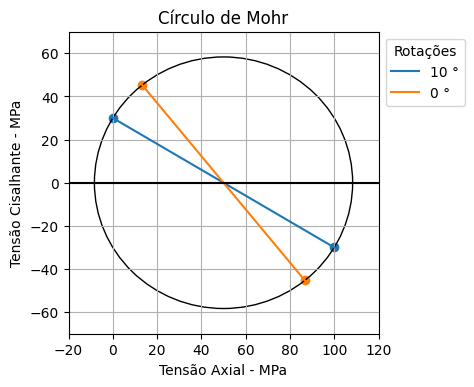

In [ ]:
M.PlotCircle()

In [ ]:
# Rotação à 5° do eixo x (real) no sentido anti-horário, utilizando a referência original
# Equivale a rotacionar para 0° e rotacionar 5° = -10 + 5 (graus)
stress_ori = M.AxialStressDegreeOrigin(-10+5)

# Rotação à 5° do eixo x (real) no sentido anti-horário, utilizando a referência 0 °
# O ânguro direto
stress_0 = M.AxialStressDegree0(5)

print('As tensões são iguais' if stress_ori == stress_0 else 'As tensões não são iguais')
print('Original =',stress_ori,'\nJá Corrigido = ',stress_0)

Os tensões são iguais
Original = 94.03094232060249 
Já Corrigido =  94.03094232060249
